### Feature Engineering

In [1]:
import sys, os
import pandas as pd

In [2]:
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

In [3]:
from Feature_Engineering import FeatureEngineering
from logger import SetupLogger
from data_loader import DataLoader

In [4]:
logger = SetupLogger(log_file='../logs/eda_log.log').get_logger()

In [5]:
df = pd.read_csv("../data/merged_fraud_data.csv")

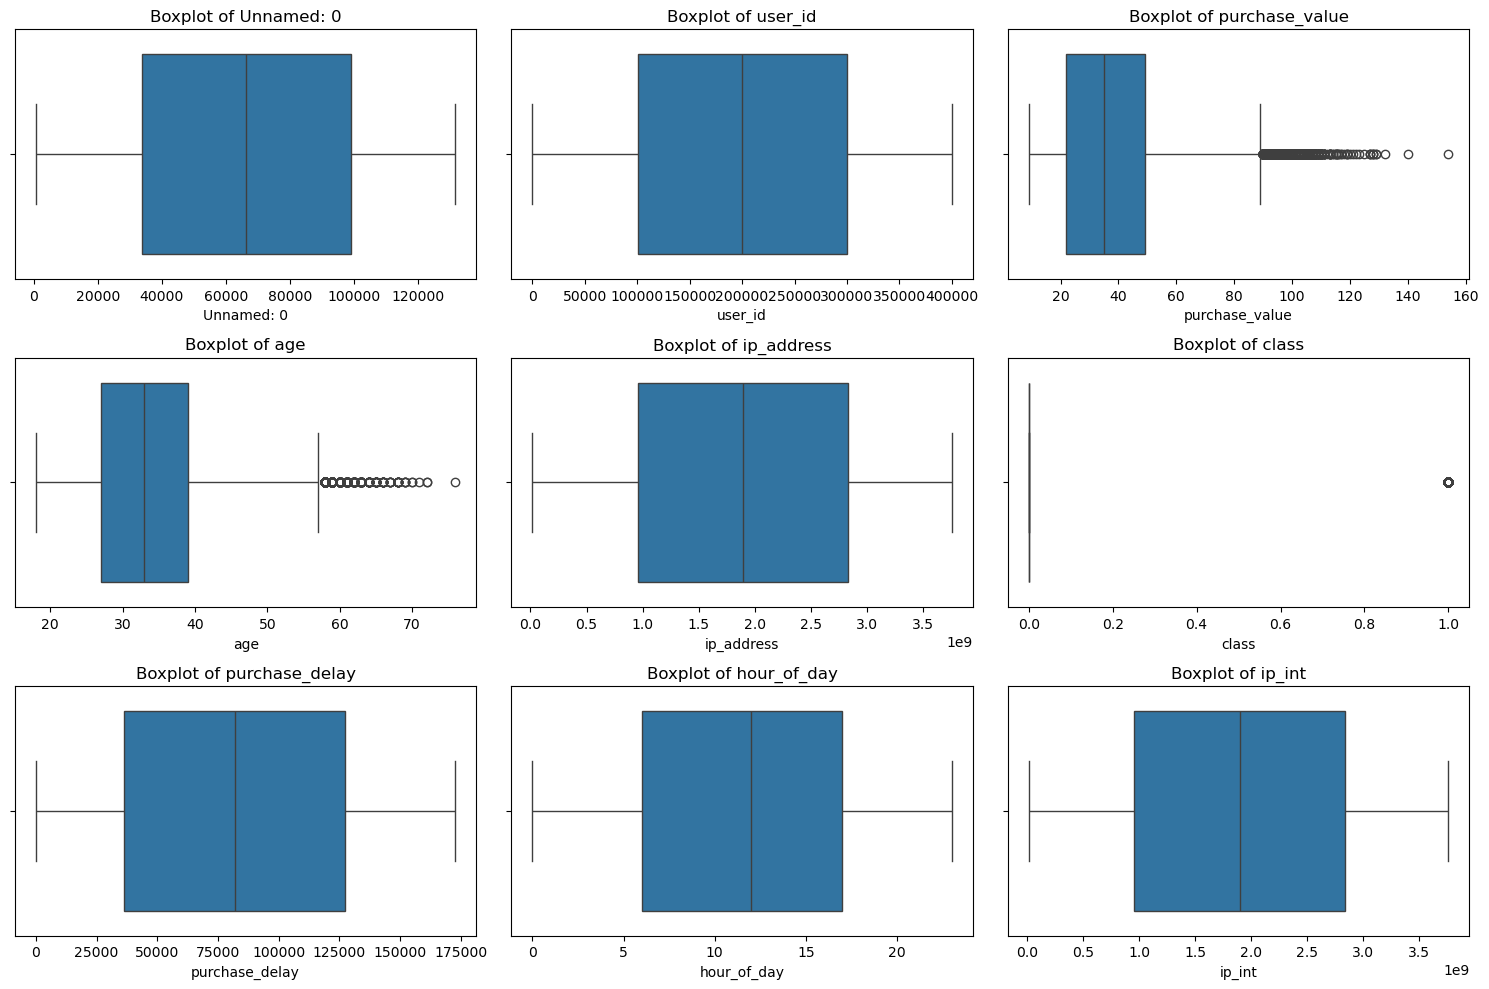

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the plots
plt.figure(figsize=(15, 10))

# Create boxplots for each numeric column
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(3, 3, i + 1)  # Adjust the grid size as needed
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [7]:
# Step 1: Lead the data set
preprocessor = DataLoader(filepath = "../data/merged_fraud_data.csv", logger=logger)
merged_data = preprocessor.load_dataset()
# Step 2: Initialize the class with the DataFrame
feature_engineering = FeatureEngineering(merged_data, logger)

# Step 3: Run the pipeline to process the data
feature_engineering.pipeline()

# Step 4: Retrieve the processed DataFrame
processed_data = feature_engineering.get_processed_data()

# View the processed data
display(processed_data.tail(10))

,purchase_value,age,class,purchase_delay,hour_of_day,day_of_week,fraud_rate,user_transaction_frequency,device_transaction_frequency,user_transaction_velocity,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M
user_id,,,,,,,,,,,,,,,,,
123893,0.222055,-1.523855,0,1.478392,-0.507558,0.989675,-0.354204,1,-0.259874,-0.232946,0.0,1.0,0.0,0.0,0.0,1.0,0.0
390857,0.385831,-1.059563,0,-0.583156,0.650149,0.491439,-0.233869,1,-0.259874,-0.232945,0.0,1.0,0.0,1.0,0.0,0.0,1.0
396983,-1.142743,-1.175636,0,-1.305124,-1.375837,-1.501506,-0.233869,1,-0.259874,-0.232941,1.0,0.0,0.0,0.0,0.0,0.0,0.0
383644,-1.197335,0.565460,0,1.434120,1.518428,-0.505034,-0.156553,1,-0.259874,-0.232946,0.0,1.0,0.0,1.0,0.0,0.0,1.0
128719,0.058279,0.913679,0,1.160900,-0.652271,1.487911,-0.354204,1,-0.259874,-0.232946,0.0,0.0,0.0,0.0,0.0,0.0,1.0
33024,1.040934,-1.756001,0,-0.744347,1.518428,-1.003270,-0.354204,1,-0.259874,-0.232944,1.0,0.0,0.0,0.0,1.0,0.0,0.0
62132,-0.050905,0.333314,0,-1.008669,1.518428,-0.006798,-0.354204,1,-0.259874,-0.232944,1.0,0.0,0.0,0.0,0.0,0.0,0.0
363333,0.003687,1.029752,0,-0.514981,0.650149,-0.006798,-0.354204,1,-0.259874,-0.232945,0.0,1.0,1.0,0.0,0.0,0.0,1.0
340800,-1.524887,0.449387,0,-1.447934,-0.362844,0.491439,-0.354204,1,-0.259874,-0.232935,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Save the processed datase to the csv for modeling
processed_data.to_csv('../data/processed_fraud_data.csv')